Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [4]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

## Name: Ciro Salcedo
## Collaborators: Yelissa Lopez, Ceasar Stringfield, Victor Zhou

# HW 6:  Linear Algebra Part 1

## Question 1

[25] - Write a function that computes the least-squares fit of a given polynomial order $n$ without using the function `numpy.linalg.lstsq` and `numpy.vander` (i.e. construct the system that needs to be solved yourself).  This function should return the coefficients of the resulting polynomial in accending order of powers.  If the function does not receive valid input (most notably an underconstrained system) raise a `ValueError` with an appropriate error message.  Make sure to mention this in your `doc-string`.  You can use `numpy.linalg.solve`. 

Also write a function that plots the resulting polynomial along with the data given the data, a set of $x$ points and the coefficients from the first function.  Make sure to label your plot (both the axes and with a legend).

In [27]:
def compute_lstsq(data, n):
    '''
    Computes the least squares fit of a given polynomial of order "n",
    for an array of points "data" returing the coeffcients of 
    the resulting polynomial in order of ascending powers.
    -raises value error for underdetermined systems'''
    
    A = numpy.empty((data.shape[0], n + 1)) 
    if data.shape[0] < n:
        raise ValueError("Underdetermined System")    

    for i in range(n + 1):
        A[:, i] = data[:, 0]**i
        
    
    p = numpy.linalg.solve(numpy.dot(A.T, A), numpy.dot(A.T, data[:,1]))

    p = numpy.array(p).flatten().tolist()
    
    return p

def plot_lstsq(data, x, p):
    '''Plots the results of the lstsq function for given data, range x, and
    polynomial p'''
    plt.figure(figsize=(10, 7))
    plt.scatter(data[:, 0], data[:, 1])
    y = numpy.zeros(len(x))
    
    for i in range(0, len(p)):
        y += p[i] * numpy.power(x, i)
    
    plt.plot(x, y,label="Order = %d" %len(p))
    plt.xlabel("x",fontsize=20)
    plt.ylabel("y",fontsize=20)
    plt.title("Polynomial Regression",fontsize=20)
    plt.grid()
    plt.legend(fontsize=15)

Success!


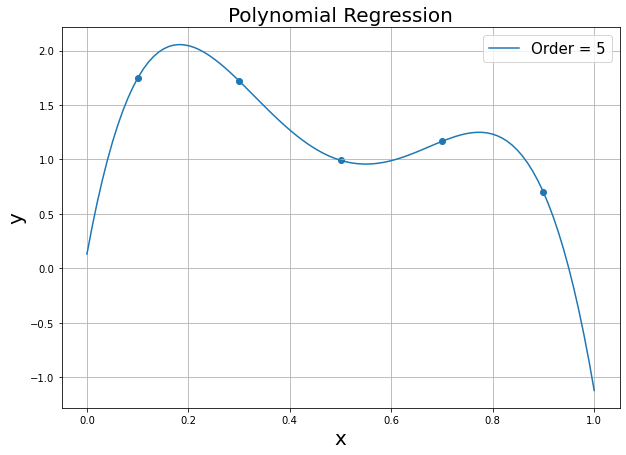

In [28]:
try:
    N = 5
    N_p = 4
    data = numpy.empty((N, 2))
    data[:, 0] = numpy.random.uniform(size=N)
    data[:, 0] = numpy.linspace(0.1, 0.9, N)
    data[:, 1] = numpy.sin(numpy.exp(-data[:, 0]**2)) + numpy.random.uniform(size=N)
    p = compute_lstsq(data, N_p)
except ValueError as e:
    raise e
else:
    P = numpy.zeros(N)
    for n in range(N):
        P += p[n] * data[:, 0]**n
    numpy.testing.assert_allclose(P, data[:, 1])
    print("Success!")

    # Plot result
    x = numpy.linspace(0.0, 1.0, 100)
    plot_lstsq(data, x, p)
    plt.show()

Success!


<ipython-input-29-3e9867412b74>:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  numpy.testing.assert_allclose(p, numpy.flipud(numpy.linalg.lstsq(A, data[:, 1])[0]))


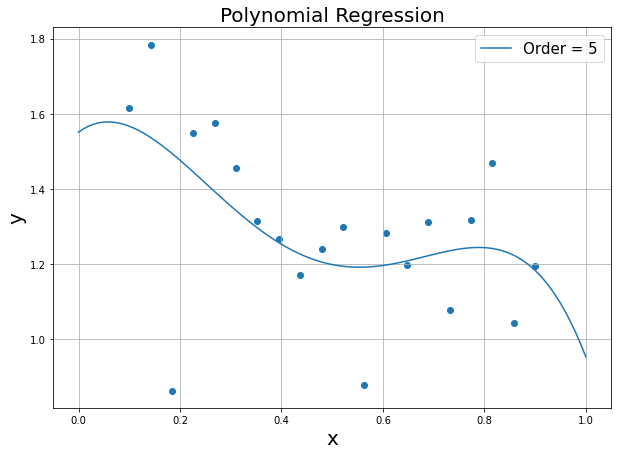

In [29]:
try:
    N = 20
    N_p = 4
    data = numpy.empty((N, 2))
    data[:, 0] = numpy.random.uniform(size=N)
    data[:, 0] = numpy.linspace(0.1, 0.9, N)
    data[:, 1] = numpy.sin(numpy.exp(-data[:, 0]**2)) + numpy.random.uniform(size=N)
    p = compute_lstsq(data, N_p)
except ValueError as e:
    print(e)
else:
    A = numpy.vander(data[:,0], N_p + 1)
    numpy.testing.assert_allclose(p, numpy.flipud(numpy.linalg.lstsq(A, data[:, 1])[0]))
    print("Success!")

    # Plot result
    x = numpy.linspace(0.0, 1.0, 100)
    plot_lstsq(data, x, p)
    plt.show()

In [20]:
try:
    N = 5
    N_p = 6
    data = numpy.empty((N, 2))
    data[:, 0] = numpy.random.uniform(size=N)
    data[:, 0] = numpy.linspace(0.1, 0.9, N)
    data[:, 1] = numpy.sin(numpy.exp(-data[:, 0]**2)) + numpy.random.uniform(size=N)
    p = compute_lstsq(data, N_p)
except ValueError as e:
    print(e)
else:
    A = numpy.vander(data[:,0], N_p + 1)
    numpy.testing.assert_allclose(p, numpy.flipud(numpy.linalg.lstsq(A, data[:, 1])[0]))
    print("Success!")

    # Plot result
    x = numpy.linspace(0.0, 1.0, 100)
    plot_lstsq(data, x, p)
    plt.show()
    assert(False)

Underdetermined System


## Question 2

Consider a square matrix that looks like
$$
    A = \frac{1}{\Delta x^2} \begin{bmatrix}
        -2 &  1 &  ~ &  ~ &  ~ &  ~ &  ~ \\
         1 & -2 &  1 &  ~ &  ~ &  ~ &  ~ \\
         ~ &  1 & -2 &  1 &  ~ &  ~ &  ~ \\
         ~ &  ~ & \ddots & \ddots & \ddots & ~ & ~\\
         ~ &  ~ & ~ & 1 & -2 & 1 & ~ \\
         ~ &  ~ & ~ & ~ & 1 & -2 & 1 \\
         ~ &  ~ & ~ & ~ &  ~ & 1 & -2 \\
    \end{bmatrix}
$$
This matrix can be characterized as having $A_{ii} = -2$, $A_{ii-1} = A_{ii+1} = 1$ so that the "main" diagonal has the value -2 and the secondary-diagonals are 1 (these are the diagonals that are just above and below the main diagonal).  This matrix is from a discretization of the second derivative using a second order finite difference formula (hence the values of 1, -2, and 1 and the $\Delta x^2$ factor) with boundary conditions set to 0.  

**(a)** [10] - Write a function that computes the eigenvalues of the matrix above using whatever functions you would like.  The function should take in the size of the matrix $m$ (the matrix should be square) and the value of $\Delta x$ and return the eigenvalues.  You may use the `numpy.linalg.eigvals` command.

In [35]:
def compute_eigenvalues(m, dx):
    '''Computes the eigenvalues of the discretization of the second derivative
    using a second order finite difference formula for matrix of size mxm and delta x
    dx'''
    A=numpy.diag(numpy.ones(m)*-2)
    A+= numpy.diag(numpy.ones(m - 1), k = 1) + numpy.diag(numpy.ones(m - 1), k = -1)
    A = A/(dx**2)
    
    eig_values = numpy.linalg.eigvals(A)
    return eig_values

In [36]:
# Compare against analytical values
m = 10
dx = 1.0 / (m + 1)
eig_values = numpy.flipud(numpy.sort(compute_eigenvalues(m, dx)))
p = numpy.arange(1, m + 1)
numpy.testing.assert_allclose(eig_values,
    2.0 / dx**2 * (numpy.cos(p * numpy.pi * dx) - 1.0))
print("Success!")

Success!


**(b)** [10] - Plot the eigenvalues in the complex plane for $m=30$ and $\Delta x = 1/31$.  Make sure to plot the axes and label everything appropriately.

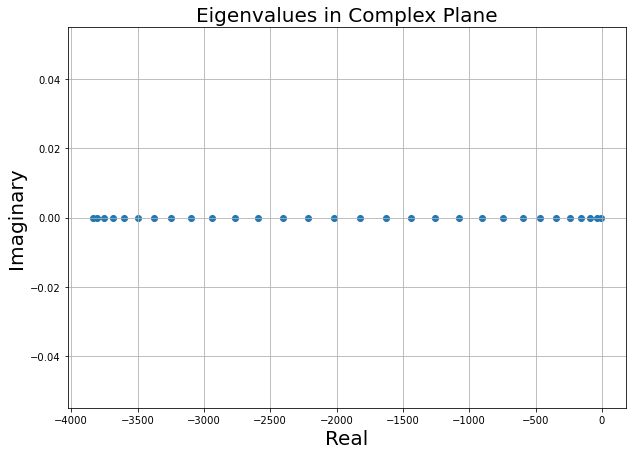

In [42]:
data =  compute_eigenvalues(30, 1 / 31)

plt.figure(figsize=(10, 7))
plt.scatter(numpy.real(data), numpy.imag(data))
plt.ylabel("Imaginary",fontsize=20)
plt.xlabel("Real",fontsize=20)
plt.title("Eigenvalues in Complex Plane",fontsize=20)
plt.grid()

**(c)** [15] - Think of the above matrix as specifying a system of ODEs.  The exact eigenvalues of the matrix are
$$
    \lambda_p = \frac{2}{\Delta x^2} (\cos(p \pi \Delta x) - 1)
$$
for $p = 1, \ldots, m$.  Find an expression for $\max_{p = 1, \ldots, m} |\lambda_p|$.  Based on our understanding of absolute stability what be the maximum time-step we could use for this system of ODEs if we used the forward Euler method?  What about for the backward Euler method?  How does this relate to the absolute stability regions of each method?



Plugging in our values we get:

$$
max_{p=1,...,m} |\lambda_p| = \frac{2}{\Delta x^2}(\cos(m\pi\Delta x)-1)=2*31^2(\cos(30\pi/31) - 1)
$$

We can maximize this by setting p = m. Thus giving the maximum eigenvalue is:

$$\max_{p = 1, \ldots, m} |\lambda_p| \leq \frac{4}{\Delta x^2}$$

By the forward Euler method we find the maximum time step:

$$ |1 + \Delta t \lambda_p| < 1$$

$$\frac{4\Delta t}{2} < \Delta x^2 ~\rightarrow~ \Delta t < \frac{\Delta x^2}{2}$$

The backward Euler method does not apply, since the left plane is contained in the stability region.

All the eigenvalues are in the stability region.

## Question 3

Let us further explore the connection between the unit-ball in various norms and the matrix norm.  For all these questions you can use `numpy.linalg.norm` and `numpy.dot` and can be approximations, not the exact versions of what is being asked.  For these questions be aware also that there is a time-limit for running a cell in a notebook imposed so your results should not take longer than 15-30 seconds.

**(a)** [10] Write a function that given a particular norm plots the given unit-ball in $\mathbb R^2$.  You may use `numpy.linalg.norm`.  Use the test code to verify your results noting that there may be some special cases that need to be handled.

In [59]:
def unit_ball(axes, ord):
    """Plot the unit-ball in $\mathbb R^2$
    
    :Input:
     - *axes* (matplotlib.axes) Axes to plot the ball on
     - *ord* (float) The norm requested.
    """
    N = 50
    X, Y = numpy.meshgrid(numpy.linspace(-1.5, 1.5, 50), numpy.linspace(-1.5, 1.5, 50))
    U = numpy.zeros((N, N)) 
    for i in range(N):
        for j in range(N):
            U[i, j] = numpy.linalg.norm(numpy.array([X[i, j], Y[i, j]]), ord=ord)
    axes.contour(X, Y, U, levels=[1])
    return U

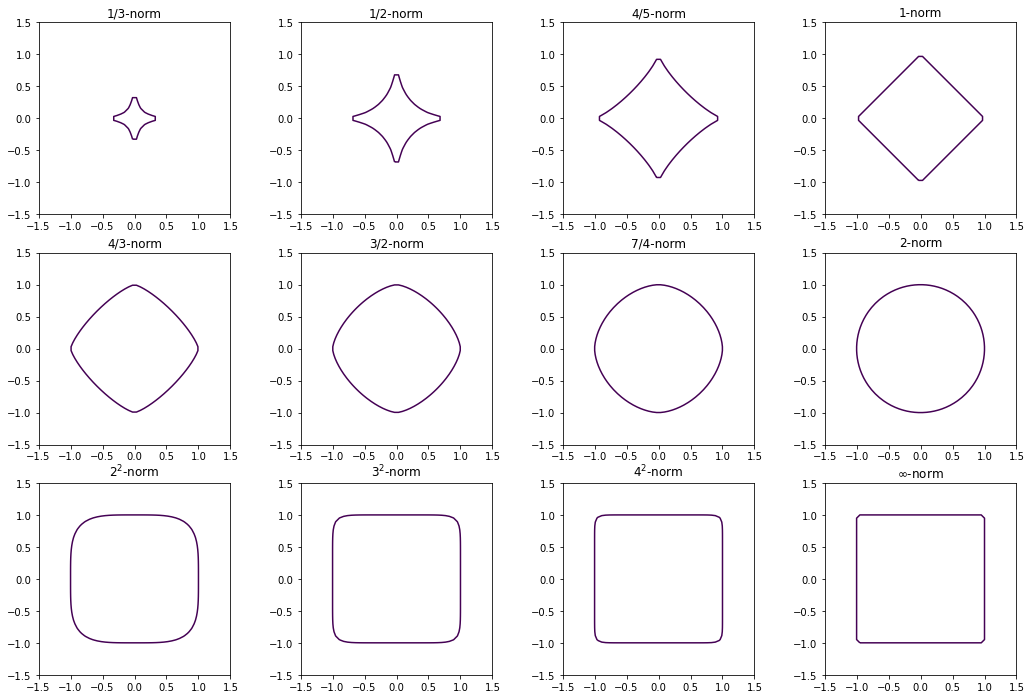

In [60]:
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 3)
fig.set_figheight(fig.get_figheight() * 3)
norms = [1.0 / 3.0, 0.5, 4.0 / 5.0, 1, 1.3, 1.5, 1.75, 2, 4, 9, 16, numpy.infty]
titles = ["1/3-norm", "1/2-norm", "4/5-norm", "1-norm", "4/3-norm", "3/2-norm", "7/4-norm", 
          "2-norm", "$2^2$-norm", "$3^2$-norm", "$4^2$-norm", "$\infty$-norm"]
for (i, ord) in enumerate(norms):
    axes = fig.add_subplot(3, 4, i + 1, aspect='equal')
    unit_ball(axes, ord)
    axes.set_title(titles[i])
plt.show()

**(b)** [10] Now write a function that produces a plot of the image of the unit-ball given a matrix $A$ and returns the resulting matrix norm.  Both of these can be estimates of the norm but mind the time it takes to compute them.  You can also use `numpy.linalg.norm` for vectors but **NOT** the matrix (unless you want to check your answer).

In [57]:
def unit_ball_image(axes, A, ord):
    """Plot the image of the unit ball under the tranformation resulting from *A* 
    and return an estimate of the matrix norm 
    
    :Input:
     - *axes* (matplotlib.axes) Axes to plot the transformed ball on
     - *A* (ndarray) Matrix that represents the mapping (transformation)
     - *ord* (float) The norm requested.
     
    :Output:
     - (float) Maximum norm estimate (i.e. the matrix norm)
    """
    max_norm=0
    N=50
    tol= 0.05
    X, Y = numpy.meshgrid(numpy.linspace(-1.5, 1.5, N), numpy.linspace(-1.5, 1.5, N))

    w = []
    
    for i in range(N):
        for j in range(N):
            U = numpy.array([X[i, j], Y[i, j]])
            if numpy.abs(numpy.linalg.norm(U, ord=ord) - 1.0) < tol:
                w.append(numpy.dot(A, U))
                max_norm = numpy.max([max_norm, numpy.linalg.norm(numpy.array(w[-1][:]), ord=ord)])
 
    w = numpy.array(w)
    axes.scatter(w[:, 0], w[:, 1]) 
    return max_norm
    

0.5-Norm (estimated, true): (5.8769131960902445, N/A)
1-Norm (estimated, true): (4.163265306122449, 4.0)
1.5-Norm (estimated, true): (4.187343949852387, N/A)
2-Norm (estimated, true): (4.317303406607691, 4.130648586880582)
4-Norm (estimated, true): (4.4861052944148785, N/A)
9-Norm (estimated, true): (4.810052580141394, N/A)
16-Norm (estimated, true): (4.928637943753043, N/A)
inf-Norm (estimated, true): (5.051020408163264, 5.0)


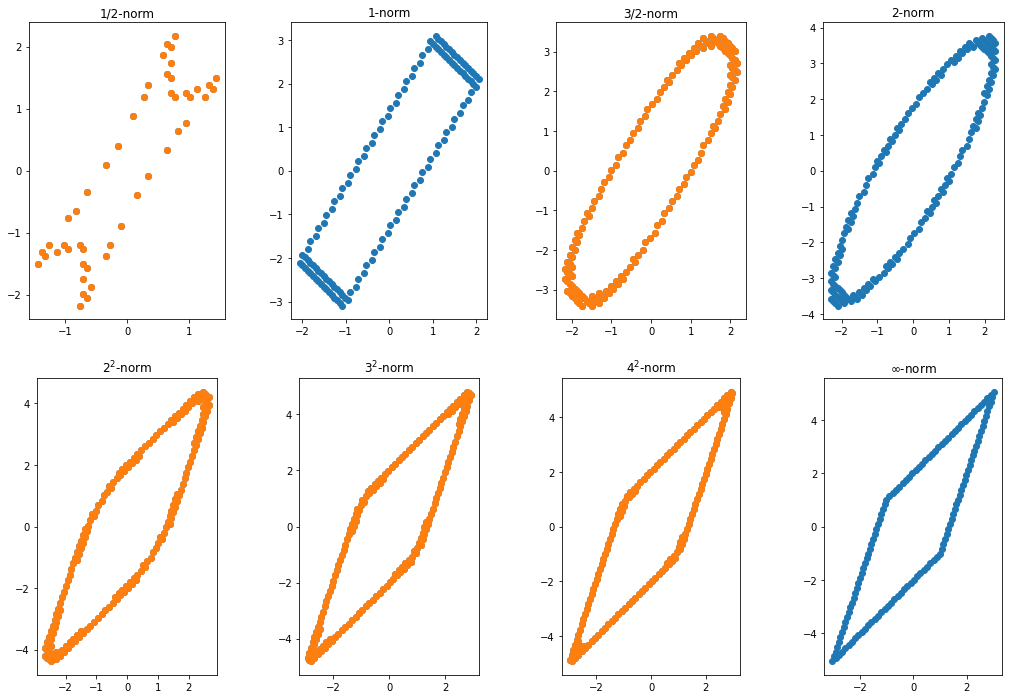

In [58]:
A = numpy.array([[1, 2], [3, 2]])

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 3)
fig.set_figheight(fig.get_figheight() * 3)
norms = [0.5, 1, 1.5, 2, 4, 9, 16, numpy.infty]
titles = ["1/2-norm", "1-norm", "3/2-norm", "2-norm", 
          "$2^2$-norm", "$3^2$-norm", "$4^2$-norm", "$\infty$-norm"]
for (i, ord) in enumerate(norms):
    axes = fig.add_subplot(2, 4, i + 1, aspect='equal')
    try:
        print("%s-Norm (estimated, true): (%s, %s)" % (ord, unit_ball_image(axes, A, ord), numpy.linalg.norm(A, ord=ord)))
    except ValueError:
        print("%s-Norm (estimated, true): (%s, N/A)" % (ord, unit_ball_image(axes, A, ord)))
    axes.set_title(titles[i])
plt.show()

**(c)** [5] What kind of observations can you make based on the two previous questions?  What connection to geometry do you see?  Are the matrix norms requested in part (b) that do not have a `numpy` implementation actually norms?

In part a, norm = 2 recovers the unit circle. Norm affects the curvature of unit ball with higher norms approaching the shape of a square. The unit ball requires that the length of the vectors are of distance 1 from the origin where the norm is defined as 

$$
|| v ||_p || (x,y)||_p = (x^p + y^p)^{\frac{1}{p}}
$$

It is clear that for p = 2, it reduces to the shape of a circle as 

$$
||v|| = \sqrt{x^2 + y^2}
$$

For the square we have
$$
||v|| = (x^\infty + y^\infty)^{\frac{1}{\infty}}
$$

In order for this norm to be one, then either x or y must be 1 creating these straight lines that form a square


The norms in part b that are given as NA but numpy are norms. The image of a matrix is the span of the column vectors of the matrix. We are providing a norm to this space


0.5-Norm (estimated, true): (5.8769131960902445, N/A)
1-Norm (estimated, true): (4.163265306122449, 4.0)
1.5-Norm (estimated, true): (4.187343949852387, N/A)
2-Norm (estimated, true): (4.317303406607691, 4.130648586880582)
4-Norm (estimated, true): (4.4861052944148785, N/A)
9-Norm (estimated, true): (4.810052580141394, N/A)
16-Norm (estimated, true): (4.928637943753043, N/A)
inf-Norm (estimated, true): (5.051020408163264, 5.0)


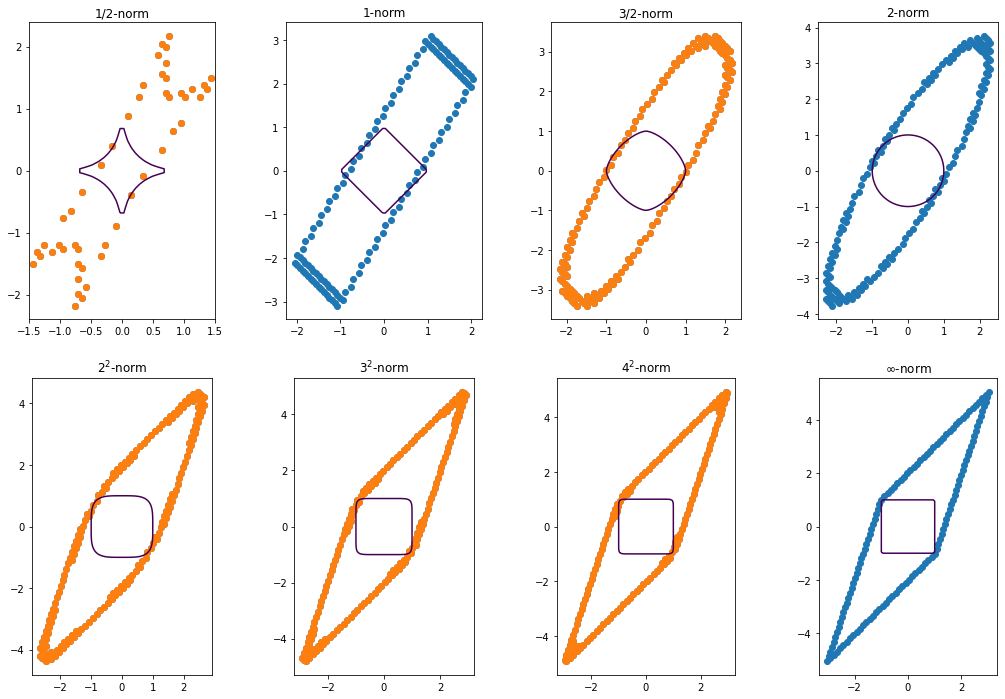

In [69]:
A = numpy.array([[1, 2], [3, 2]])

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 3)
fig.set_figheight(fig.get_figheight() * 3)
norms = [0.5, 1, 1.5, 2, 4, 9, 16, numpy.infty]
titles = ["1/2-norm", "1-norm", "3/2-norm", "2-norm", 
          "$2^2$-norm", "$3^2$-norm", "$4^2$-norm", "$\infty$-norm"]
for (i, ord) in enumerate(norms):
    axes = fig.add_subplot(2, 4, i + 1, aspect='equal')
    try:
        print("%s-Norm (estimated, true): (%s, %s)" % (ord, unit_ball_image(axes, A, ord), numpy.linalg.norm(A, ord=ord)))
    except ValueError:
        print("%s-Norm (estimated, true): (%s, N/A)" % (ord, unit_ball_image(axes, A, ord)))
    unit_ball(axes, ord)
    axes.set_title(titles[i])
plt.show()

I was hoping that overlaying these images would provide insight